<a href="https://colab.research.google.com/github/wwwh0225/elements-of-statistical-learning/blob/main/Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basis_Expansions_and_Regularization

## Introduction

在先前我們所討論的模型，如線性迴歸、LDA、羅吉斯迴歸等皆是透過樣本資料建立線性關係，而真實的 $f(X)$ 很可能不是線性的，而發展出線性模型除了方便和易解釋之外，也可以將其視為 $f(X)$ 的一階泰勒逼近。在這個章節，我們希望透過配適各種 $X$ 的轉換來建構 $f(X)$ 。

我們定義第 $m$ 個 $X$ 的轉換為 $h_m(X): \mathbb{R}^p \rightarrow \mathbb{R}$，而 $m = 1,\cdots,M$ ，可得：

$$f(X) = \sum_{m=1}^M \beta_m h_m(X)$$

此即 $X$ 的線性基底展開式(linear basis expansion)，當我們決定好 $h_m$ 後，即可進行配適。以下是一些常見 $h_m$ 的範例：

- $h_m(X) = X_m,\ m=1,\cdots,p$ 即會轉回原本的線性模型。
- $h_m(X) = X^2_j$ 或 $h_m(X)=X_j X_k$ 也就是多項式的逼近(更高階的泰勒逼近)，但這會導致多項式的維度過大。
- $h_m(X) = \log(X_j),\sqrt{X_j},\cdots$ 此為 $X$ 的非線性轉換。
- $h_m(X) = I(L_m \leq X_k \leq U_m)$ ，由於 $I(\cdot)$ 為指示函數，故模型為此為 piecewise constant model 。

多項式函數是使用基底展開 $f(X)$ 的好例子，但其也有模型的缺點，就是在 remote regions (可以想像是左右兩端) 的震盪較大，但可以較好的配適中間的部分。

下列有三種比較適當的方式可以提供我們選擇 spline 函數的指引

1. Restriction methods：也就是**事先**決定好函數的種類，比如我們限制模型具備可加性，也就是將每個 $f_j(\cdot)$ 切成 $M_j$ 段相加。

$$f(X) = \sum_{j=1}^p f_j(X_j) = \sum_{j=1}^p \sum_{m=1}^{M_j}\beta_{jm}h_{jm}(X_j)$$

2. Selection methods：只選擇包含對模型顯著的基底函數，比如說一些 stagewise greedy 的方法 CART、MARS 等方法。

3. Regularization methods：我們可以使用所有的 basis dictionary ，但是我們對係數做了限制，比如說 ridge regression。

## Piecewise Polynomials and Splines

我們在此先假設 $X$ 是一維向量( $p=1$ )，所謂 piecewise polynomial model 就是將 $X$ 的定義域(domain)切成多個連續的區間(intervals)。

![](https://esl.hohoweiya.xyz//img/05/fig5.1.png)

在圖 5.1 的左上圖，展示 piecewise constant model，我們將 $X$ 分成三段，也就是要建立兩個 knots $(\xi_1,\xi_2)$ ，也會建立**三**個 basis functions: 
$$h_1(X)=I(X < \xi_1),\ h_2(X)=I(\xi_1 \leq X < \xi_2),\ h_3(X)=I(\xi_2 \leq X)$$

所以 $f(X)$ 可以表示成 $f(X)=\sum_{m=1}^3\beta_m h_m(X)$ ，而對第 $m$ 個區域的估計 $\beta_m$ 為 $\hat{\beta_m}=\bar{Y_m}$ 。

$$\hat{\beta}=\mathop{\arg\min}\limits_{\beta}(\int_{\xi_L}^{\xi_1}(f(X)-\beta_1)^2dX + \int_{\xi_1}^{\xi_2}f(X)-\beta_2)^2dX + \int_{\xi_2}^{\xi_U}f(X)-\beta_2)^2dX)$$

而右上角的圖為 piecewise linear model，也就是在上一個常數模型之下， 再增加一個 $X$ 項，所以會再多三項 $h_{m+3}=h_m(X)X,\ m=1,2,3$ 。

除了一些特殊情形，我們會希望所作出的圖如左下圖所示，為分段線性，但是在 knots 處是連續的( $f(\xi_1^-)=f(\xi_1^+)$ )。回到剛剛所建構的 piecewise linear model，也就是 $\beta_1 + \xi_1\beta_4 = \beta_2 + \xi_1\beta_5$ 和 $\beta_2 + \xi_2\beta_5 = \beta_3 + \xi_2\beta_6$ ，由於有兩個 knots ，故參數相較上一個模型可以減少2個，我們可以將基底函數表示成：

$$h_1(X)=1,\ h_2(X)=X ,\ h_3(X)=(X-\xi_1)_+,\ h_4(X)=(X-\xi_2)_+$$

![](https://esl.hohoweiya.xyz//img/05/fig5.2.png)

在討論完線性的情況後，圖 5.2 展現了非線性的多項式配適的結果，並展現了不連續、連續、在一階微分連續、在二階微分連續等結果。

在限制函數一階和二階可微分的情況之下，我們至少需要一個三次多項式，這也就是所謂 *Cubic spline* ，同樣回到兩個 knots 的情形，cubic spline 會要求 **6** 個 basis function，

$$6 = 3 個區域 \times 每區域4個參數 - 2 個 knots \times 3條限制式$$

我們可以將這些 basis functions 整理如下(課本式5.3)：

$$\begin{matrix}
h_1(X)=1, &h_3(X)=X^2,  & h_5(X)=(X-\xi_1)^3_+\\ 
h_2(X)=X, & h_4(X)=X^3, & h_6(X)=(X-\xi_2)^3_+
\end{matrix}$$

上述結果不難證明，我們的證明如下：

---

### Proof of  (5.3).  (from Ex. 5.1)
**Show that the truncated power basis functions in (5.3) represent a basis for a cubic spline with the two knots as indicated.**

我們令 $i=1,2$ 而我們令函數在常數、一階微分、二階微分連續，也就是：

$$\begin{matrix}
f(\xi_i^-)=f(\xi_i^+), & f'(\xi_i^-)=f'(\xi_i^+),  & f''(\xi_i^-)=f''(\xi_i^+)
\end{matrix}$$

若我們令各個 region 的三次多項式如下：

$$\begin{aligned}
g_1(X) &= \gamma_1+\gamma_2X+\gamma_3X^2+\gamma_4X^3 \\
g_2(X) &= \gamma_5+\gamma_6X+\gamma_7X^2+\gamma_8X^3 \\
g_3(X) &= \gamma_9+\gamma_{10}X+\gamma_{11}X^2+\gamma_{12}X^3 
\end{aligned}$$

而我們在此對 $\xi_1$ 這個 knot 做左右逼近，並且限制 $g_1(X)$ 和 $g_2(X)$ 在常數、一階微分、二階微分連續，限制式如下：

$$\begin{aligned}
As\ h \rightarrow 0&, \\
g_1(\xi_1-h) &= \gamma_1+\gamma_2(\xi_1-h)+\gamma_3(\xi_1-h)^2+\gamma_4(\xi_1-h)^3\\
&= \gamma_5+\gamma_6(\xi_1+h)+\gamma_7(\xi_1+h)^2+\gamma_8(\xi_1+h)^3 =g_2(\xi_1+h) \\
g_1'(\xi_1-h) &= \gamma_2+2\gamma_3(\xi_1-h)+3\gamma_4(\xi_1-h)^2\\
&= \gamma_6+2\gamma_7(\xi_1+h)+3\gamma_8(\xi_1+h)^2 =g_2'(\xi_1+h)\\
g_1''(\xi_1-h) &= 2\gamma_3+6\gamma_4(\xi_1-h)\\
&= 2\gamma_7+6\gamma_8(\xi_1+h) =g_2''(\xi_1+h)
\end{aligned}$$

Rearrange those arguments,

$$\begin{aligned}
\gamma_3-\gamma_7 &= 3(\gamma_8-\gamma_4)\xi_1 \\ 
\gamma_2-\gamma_6 &= 2(\gamma_7-\gamma_3) + 3(\gamma_8-\gamma_4)\xi_1^2=-3(\gamma_8-\gamma_4)\xi_1^2\\
\gamma_1-\gamma_5 &= (\gamma_6-\gamma_2)\xi_1 + (\gamma_7-\gamma_3)\xi_1^2+(\gamma_8-\gamma_4)\xi_1^3
\end{aligned}$$

接著，令 $h(x)=g_1(x)+(\gamma_8-\gamma_4)(x-\xi_1)^3_+$ ，若 $x<\xi_1$ 則 $h(x)=g_1(x)$，但若 $x \geq \xi_1$ 則：

$$\begin{aligned}
h(x)&=g_1(x)+(\gamma_8-\gamma_4)(x-\xi_1)^3_+\\
&=\gamma_1+\gamma_2x+\gamma_3x^2+\gamma_4x^3 +(\gamma_8-\gamma_4)x^3-3(\gamma_8-\gamma_4)\xi x^2+3(\gamma_8-\gamma_4) \xi_1^2 x-(\gamma_8-\gamma_4) \xi_1^3\\
&=\gamma_1+\gamma_2x+\gamma_3x^2+\gamma_4x^3 + (\gamma_8-\gamma_4)x^3 -(\gamma_3-\gamma_7)x^2+(\gamma_6-\gamma_2)x-(\gamma_1-\gamma_5)\\
&=\gamma_5+\gamma_6x+\gamma_7x^2+\gamma_8x^3 = g_2(x)
\end{aligned}$$

而在 $\xi_2$ 的連續情況也同理，因此可統整出如式5.3一樣的結果。

---

在認識 **Cubic spline** 後，我們可以拓展到更一般化的 $M$ 階 spline (order-M spline)且有 $K$ 個 knots $(\xi_j,\ j=1,\cdots,K)$ ，並且限制到 $M-2$ 階連續可微，我們先前看到的 cubic spline 是$M=4$ 的情形，而 piecewise constant model 就是 $1$ 階 spline，而我們最常選擇 $M=1,2,4$的情形。

在這個一般化的情況之下，truncated-power basis set 為：

$$\begin{aligned}
h_j(X)&= X^{j-1},\ j=1,\cdots,M\\
h_{M+l}(X) &= (X-\xi_l)^{M-1}_+,\ l=1,\cdots,K 
\end{aligned}$$

truncated-power basis 在高維度的情況下會有數值估計上的問題，故我們接著引進 **B-spline** 來解決這類的問題，即使在 knots 數目 $K$ 很大時也能有好的計算。

## B-spline
[B-spline](https://www.796t.com/content/1548858635.html)

B-spline 是一個計算上較有效率的配適方法，我們在 knots 上也有其他的設定，我們定義兩個邊界的(boundary) knots  $\xi_0 < \xi_1$ 和 $\xi_K < \xi_{K+1}$ ，並且定義增廣的 knots 序列 $\tau$ 如下：

$$\begin{aligned}
& \tau_1 \leq \tau_2 \leq \cdots \leq \tau_M \leq \xi_0 \\
& \tau_{j+M}=\xi_j,\ j=1,\cdots,K \\
& \xi_{K+1} \leq \xi_{K+M+1} \leq \xi_{K+M+2} \leq \cdots \leq \xi_{K+2M}
\end{aligned}$$

我們將 $B_{i,m}(x)$ 記為 knots sequence $\tau$ 的第 $i$ 個 $m$ 階 B-spline basis function 其中 $m \leq M$ ，我們遞迴地將其計算如下：

$$B_{i,1}(x)=\left\{\begin{matrix}
 1 & if\ \tau_1 \leq x <\tau_{i+1}  \\ 
 0 & o.w
\end{matrix}\right. ,\ for \ i=1,\cdots,K+2M-1$$

$$B_{i,m}(x)= \frac{x=\tau_i}{\tau_{i+m-1}-\tau_i}B_{i,m-1}(x)+\frac{\tau_{i+m}-x}{\tau_{i+m}-\tau_{i+1}}B_{i+1,m-1}(x)$$







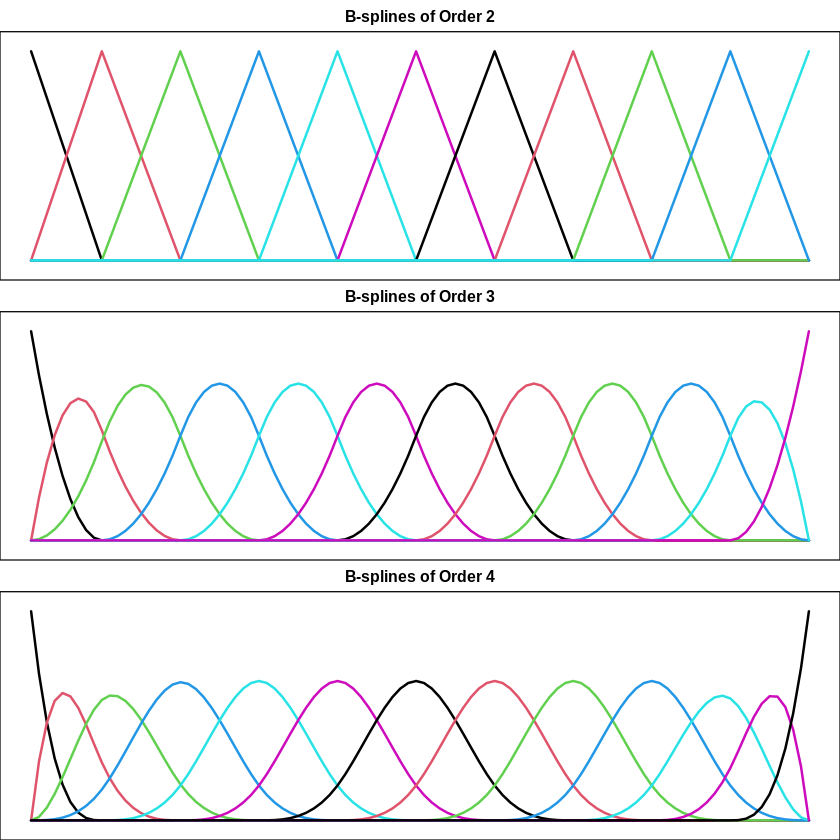

In [1]:
#{r B-spline}
library(splines)
par(mfrow = c(3, 1), mar = c(0, 0, 2, 0))

for (d in 1:3)
{
  bs_d = bs(1:100, degree = d, knots = seq(10, 90, 10), intercept = TRUE)
  matplot(1:100, bs_d, type = ifelse(d == 0, "s", "l"), lty = 1, ylab = "spline", 
          xaxt = 'n', yaxt = 'n', ylim = c(-0.05, 1.05), lwd = 2)
  # title(paste("degree =", d))
  title(paste("B-splines of Order", d+1))
}

## Natural Cubic Splines

由於我們對多項式的配適會在邊界處較不穩定，natural cubic splines 要求二階和三階微分在邊界處為0( i.e. $min(x)$ and $max(x)$ )，因此，配適好的模型會在兩個邊界之外(i.e $(−\infty, \xi_1]$ and $[\xi_K, \infty)$ )為線性。由於有兩個邊界與兩個限制式，我們因此可以減少四個自由度，而 $K$ 個 knots 的 natural cubic splines 具有 $K$ 個 basis functions。從先前提到的 truncated power series basis 出發，可得：( 課本式 5.4 和 式 5.5 )

$$N_1(X)=1,\ N_2(X)=X,\ N_{k+2}(X)= d_k(X)-d_{K-1}(X)$$

其中，

$$d_k(X) = \frac{(X-\xi_k)^3_+ - (X-\xi_K)^3_+ }{\xi_K-\xi_k}$$

我們可以證明如下：
 

---

### Proof of  (5.4) and (5.5).  (from Ex. 5.4)

**Consider the truncated power series representation for cubic splines with K interior knots. Let**

$$f(X) = \sum_{j=0}^3\beta_j X^j + \sum_{k=1}^K \theta_k(X-\theta_k)^3_+$$

**Prove that the natural boundary conditions for natural cubic splines (Section 5.2.1) imply the following linear constraints on the coefficients:**

$$\begin{matrix}
\beta_2=0, &  \sum_{k=1}^K \theta_k =0  \\ 
\beta_3=0, & \sum_{k=1}^K \xi_k\theta_k =0
\end{matrix}$$

**Hence derive the basis (5.4) and (5.5).**

我們先看到最左側的區域 $(-\infty,\xi_1)$ ：

$$\begin{aligned}
f(x) &= \sum_{j=0}^3 \beta_j x^j = \beta_0 + \beta_1 x +\beta_2 x^2+\beta_3 x^3\\
f'(x) &= \beta_1 + 2 \beta_2 x + 3\beta_3x^3\\
f''(x)&=2\beta_2+6\beta_3x
\end{aligned}$$

而根據 natural cubic splines 對邊界條件的定義，可得： $f''(x)=0$ 且要對 $\forall x \in (-\infty,\xi_1)$ 都成立，因此 $\beta_2=\beta_3=0$ 。

而我們再看到另外一邊的右邊界 $(\xi_k,\infty)$ ：

$$\begin{aligned}
f(x) &= \sum_{j=0}^3\beta_j x^j + \sum_{k=1}^K \theta_k(x-\xi_k)^3 \\
&=\beta_0 + \beta_1 + \sum_{k=1}^K \theta_k(x^3-\xi_k^3-3x^2\xi_k+3x\xi_k^2)\\
f'(x) &= \beta_1 + 3  \sum_{k=1}^K \theta_k(x-\xi_k)^2 \\
f''(x) &= 6  \sum_{k=1}^K \theta_k(x-\xi_k)
\end{aligned}$$

與先前討論的結果一樣，我們在此引入 natural cubic splines 對二階導數以及線性的限制，可得：

$$\begin{aligned}
 \sum_{k=1}^K \theta_k\xi_k&=0 \\
 \sum_{k=1}^K \theta_k&=0 
\end{aligned}$$

至此，我們已推導出對係數的一些限制。

我們改寫上述關係如下：

$$\left\{\begin{matrix}
\theta_{K-1}+ \theta_K = - \sum_{k=1}^{K-2}\theta_k \\ 
\xi_{K-1}\theta_{K-1}+\xi_{K}\theta_{K} = - \sum_{k=1}^{K-2} \theta_k \xi_k
\end{matrix}\right.$$

經過整理，可得

$$\begin{aligned}
\theta_{K-1} &= \frac{\sum_{k=1}^{K-2}\theta_k(\xi_k-\xi_K)}{\xi_K-\xi_{K-1}}\\
\theta_{K} &= \frac{\sum_{k=1}^{K-2}\theta_k(\xi_{K-1}-\xi_k)}{\xi_K-\xi_{K-1}}
\end{aligned}$$

我們將上面的關係式代入 $f(X)$ ：


$$\begin{aligned}
f(x) &= \beta_0 + \beta_1x + \sum_{k=1}^K \theta_k(x-\xi_k)^3_+ \\
&= \beta_0 + \beta_1x + \sum_{k=1}^{K-2} \theta_k(x-\xi_k)^3_+ + \frac{\sum_{k=1}^{K-2}\theta_k(\xi_k-\xi_K)}{\xi_K-\xi_{K-1}}(x-\xi_{K-1})^3_+ + \frac{\sum_{k=1}^{K-2}\theta_k(\xi_{K-1}-\xi_k)}{\xi_K-\xi_{K-1}} (x-\xi_K)^3_+\\
&= \beta_0 + \beta_1x + \sum_{k=1}^{K-2}\theta_k [(\xi_K-\xi_k)\frac{(x-\xi_k)^3_+ - (x-\xi_K)^3_+ }{\xi_K-\xi_k}-(\xi_K-\xi_k)\frac{(x-\xi_{K-1})^3_+ - (x-\xi_K)^3_+ }{\xi_K-\xi_{K-1}}]\\
&= \beta_0 + \beta_1x +  \sum_{k=1}^{K-2}\theta_k (\xi_K-\xi_k) + [d_k(x)-d_{K-1}(x)]\\
&= \beta_0 N_1(x) + \beta_1 N_2(x) +  \sum_{k=1}^{K-2}\theta_k(\xi_K-\xi_k)N_{k+2}(x)
\end{aligned}$$


此即課本中所說的  natural cubic splines basis 。

---

### Example: South Africa Heart Disease




Call: gam(formula = chd ~ ns(sbp, df = 4) + ns(tobacco, df = 4) + ns(ldl, 
    df = 4) + famhist + ns(obesity, df = 4) + ns(alcohol, df = 4) + 
    ns(age, df = 4), family = binomial, data = SAheart)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-1.7245 -0.8265 -0.3884  0.8870  2.9589 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 596.1084 on 461 degrees of freedom
Residual Deviance: 457.6318 on 436 degrees of freedom
AIC: 509.6318 

Number of Local Scoring Iterations: 6 

Anova for Parametric Effects
                     Df Sum Sq Mean Sq F value    Pr(>F)    
ns(sbp, df = 4)       4   6.31  1.5783  1.4242  0.224956    
ns(tobacco, df = 4)   4  18.09  4.5218  4.0802  0.002941 ** 
ns(ldl, df = 4)       4  12.05  3.0137  2.7194  0.029290 *  
famhist               1  19.70 19.7029 17.7788 3.019e-05 ***
ns(obesity, df = 4)   4   3.66  0.9161  0.8266  0.508701    
ns(alcohol, df = 4)   4   1.28  0.3200  0.2887  0.885278    
ns(age, df = 4)   

Warning message in gplot.default(x = c("Present", "Absent", "Present", "Present", :
“The "x" component of "partial for famhist" has class "character"; no gplot() methods available”


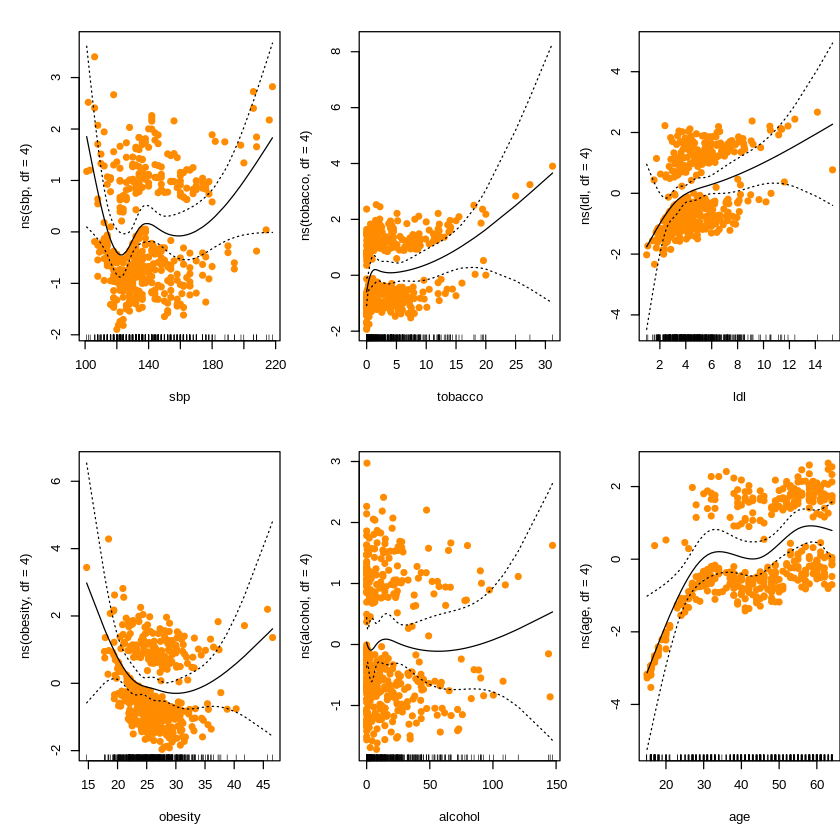

In [ ]:
library(gam)
library(splines)

SAheart <- read.table('/SAheart.data', fileEncoding = "UTF-8", sep = ",",header = T)


m <- gam(chd ~ ns(sbp,df=4) + ns(tobacco,df=4) + 
          ns(ldl,df=4) + famhist + ns(obesity,df=4) + 
          ns(alcohol,df=4) + ns(age,df=4), data=SAheart, family=binomial)

summary(m)

par(mfrow = c(2, 3), mar = c(5, 5, 2, 0))
plot(m, se = TRUE, residuals = TRUE, pch = 19, col = "darkorange")


### Example: Phoneme(音素) Recognition

---


## Smoothing Splines


在過去的 splines 方法，我們都必須去決定 knots 的位置，但在此，我們討論一個自動建立 knots 的的模型，也就是使用 knots 的最大集合，而我們透過正則化(regularization)的方式來決定模型的複雜度。因為若我們不去限制模型的複雜度，我們一定可以配適到到一條通過每個點的函數，使 $RSS=0$ ，但這樣會導致模型過度配適 (overfitting) 的問題，因此，我們在此加入懲罰項，我們定義此模型的損失函數如下：

令 $f(x)$ 是二階連續可微，且定義**penalized residual sum of squares**為：

$$RSS(f,\lambda) = \sum_{i=1}^N\{ y_i - f(x_i) \}^2 + \lambda \int \{f''(t) \}^2 dt$$

其中， $\lambda$ 為**非負**的 tuning parameter 或稱 fixed smoothing parameter。 上式第一項衡量模型的配適程度，第二項針對模型曲率進行懲罰。我們可以考慮兩種極端的情形：

- $\lambda=0$ : $f$ 可以為任意經過每個資料點的函數。
- $\lambda = \infty$ : 因為 $\lambda = \infty$ ，故我們一定要要求二階微分為 $0$  ，故函數必須為線性，為簡單最小平方法所配適出來的直線。

我們可以證明， 當我們在極小化 $RSS(f,\lambda)$ 時，會有一個最小值，是擁有不重複的 (unique) $x_i,\ i=2,\cdots,N$ 的 knots 的 **natural cubic spline**。



---

### 證明 smoothing splines (from Ex. 5.7)

**Derivation of smoothing splines (Green and Silverman, 1994). Suppose that $N \geq 2$, and that $g$ is the natural cubic spline interpolant to the pairs $\{x_i, z_i\}_1^N$ , with $a < x_1 < \cdots < x_N < b$. This is a natural spline with a knot at every $x_i$; being an $N$-dimensional space of functions, we can determine the coefficients such that it interpolates the sequence $z_i$ exactly. Let $\tilde{g}$ be any other differentiable function on $[a, b]$ that interpolates the $N$ pairs.**

**(a) Let $h(x)=\tilde{g}(x)-g(x)$. Use integration by parts and the fact that g is a natural cubic spline to show that**

$$\int_{a}^{b}g''(x)h''(x)dx = -\sum_{j=1}^{N-1}g'''(x_j^+)\{ h(x_{j+1})-h(x_{j}) \}=0$$

依照題意，我們在此使用分部積分法來推導上式關係：

$$\begin{aligned}
\int_{a}^{b}g''(x)h''(x)dx &= \underbrace{g''(x)h'(x)|^b_a}_{=0,\ g''(a)=g''(b)=0} -\int_a^b g'''(x)h'(x)dx \\
&= - \sum_{i=1}^{N-1}\int_{x_i}^{x_{i+1}}g'''(x)h'(x)dx \\
&= - \sum_{i=1}^{N-1} \underbrace{ [g'''(x)h(x)]|_{x_i}^{x_{i+1}} }_{=0,\ h(x_i)=\tilde{g}(x_i)-g(x_i)=0,\ \forall i} + \sum_{i=1}^{N-1} \underbrace{\int_{x_i}^{x_{i+1}}g^{(4)}(x)h(x)dx }_{=0,\ g(\cdot)\ is\ cubic }\\
&=0
\end{aligned}$$

我們可以看到，我們在此使用了 natural cubic spline 對邊界配適直線的設定 (二次微分為 $0$ )，得到 $g''(a)=g''(b)=0$ 。而後再執行一次分部積分，可以看到根據 $h(\cdot)$ 的定義，可得 $h(x_i) = \tilde{g}(x_i)-g(x_i)=0\ ,\forall i$ 且 $g^{(4)}(x)=0$ ，故得證。

**(b) Hence show that**

$$\int_{a}^{b}\tilde{g}''(t)^2dt \geq \int_{a}^{b} g''(t)^2dt\ ,$$

**and that equality can only hold if h is identically zero in  $[a, b]$ .**

我們可以展開不等號左方的積分如下：

$$\begin{aligned}
\int_{a}^{b}\tilde{g}''(t)^2dt &= \int_{a}^{b} (g''(t)+h''(t))^2dt \\
&=\int_{a}^{b} g''(t)^2 dt + \int_{a}^{b} h''(t)^2 dt + 2\underbrace{\int_{a}^{b} g''(t)h''(t)dt}_{=0,\ by\ (a)}\\
&= \int_{a}^{b} g''(t)^2 dt + \int_{a}^{b} h''(t)^2 dt
\end{aligned}$$

除非在  $[a,b],\ h''(t)=0$ 否則 $\int_{a}^{b}\tilde{g}''(t)^2dt \geq \int_{a}^{b} g''(t)^2dt$ 必定成立，換句話說，**「等號」**成立於 $h''(t)=0,\ \forall t\in [a,b]$ 時，此條件也等同於 $h(t)=0,\ \forall t\in [a,b]$ 。

**(c) Consider the penalized least squares problem**

$$\min_f[\sum_{i=1}^N(y-f(x_i))^2+\lambda \int_{a}^{b}f''(t)^2dt]$$

Use (b) to argue that the minimizer must be a cubic spline with knots at each of the $x_i$ .

我們令 $\tilde{g}(x)$ 是極小化目標函數的函數，且 $g(x)$ 為 natural cubic spline ，故在 knots 處有 $g(x_i)=\tilde{g}(x_i),\ i=1,\cdots,N$ 。故如在 **(b)** 得到的結果：

$$\int_{a}^{b}\tilde{g}''(t)^2dt \geq \int_{a}^{b} g''(t)^2dt \ \Rightarrow \lambda \int_{a}^{b}\tilde{g}''(t)^2dt \geq \lambda \int_{a}^{b} g''(t)^2dt,\ \lambda >0$$

但既然 $\tilde{g}(\cdot)$ 已經能極小化損失函數，但 ${g}(\cdot)$ 的積分取值還更小，故只有  $\tilde{g}(\cdot)$ 等價於 ${g}(\cdot)$ 也就是 natural cubic spline 。


---

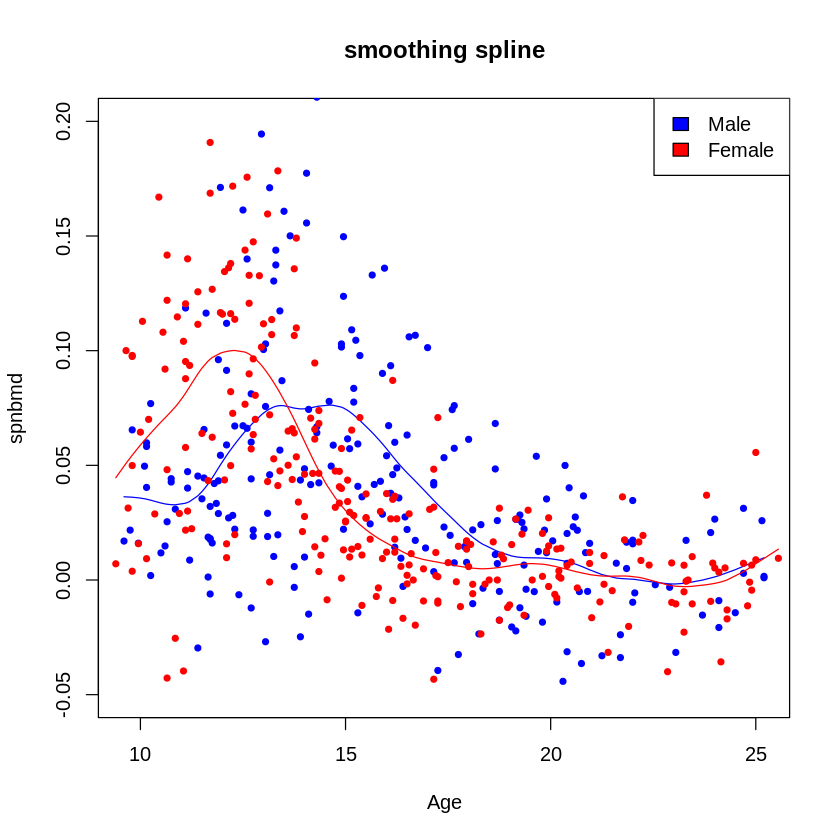

In [ ]:
#重制課本圖5.6

bone <- read.table('/bone.data',header = T)

males = bone$gender == "male" 
females = bone$gender == "female"

boneMaleSmooth = smooth.spline( bone[males,"age"], bone[males,"spnbmd"], df=12 )
boneFemaleSmooth = smooth.spline( bone[females,"age"], bone[females,"spnbmd"], df=12 )

plot(boneMaleSmooth, ylim=c(-0.05,0.20), col="blue", type="l", xlab="Age", ylab="spnbmd",main='smoothing spline')
points(bone[males,c(2,4)], col="blue", pch=20)

lines(boneFemaleSmooth, ylim=c(-0.05,0.20), col="red")
points(bone[females,c(2,4)], col="red", pch=20)
legend("topright",c('Male','Female'),fill =c('blue','red' ))

由於 smoothing spline 的解是 natural spline ，故我們可以將 $f(x)$ 寫成以下形式：

$$f(x)=\sum_{j=1}^N N_j(x)\theta_j$$

而我們說 $N_j(x)$ 是 $N$ 維的 basis functions，我們的損失函數寫成矩陣的形式即為：

$$RSS(\theta,\lambda) = (\mathbf{y}-\mathbf{N}\theta)^T(\mathbf{y}-\mathbf{N}\theta)+\lambda \theta^T \mathbf{\Omega_N}\theta$$

其中 $\{\mathbf{N} \}_{ij}=N_j(x_i)$ 且 $\{\mathbf{\Omega_N} \}_{jk} = \int N''_j(t)N''_k(t)dt$ 。

可以求出： $\hat{\theta} = (\mathbf{N}^T\mathbf{N}+\lambda\mathbf{\Omega_N})^{-1}\mathbf{N}^T\mathbf{y}$

這是 **generalized ridge regression** 的形式。

## 自由度與 Smoother Matrices

在先前的討論，我們尚未提到 smoothing spline 自由度的問題，若我們有預先決定好的(pre-chosen) $\lambda$ ，所求出的 $\mathbf{\hat{f}}$ 就會是 $\mathbf{y}$ 的一種線性組合，故稱 linear smoother 。

$$\begin{aligned}
\mathbf{\hat{f}} &= \mathbf{N}(\mathbf{N}^T\mathbf{N}+\lambda\mathbf{\Omega_N})^{-1}\mathbf{N}^T\mathbf{y} \\
&=  \mathbf{S_\lambda y}
\end{aligned}$$

我們稱 $\mathbf{S_\lambda}$ 為 **smoother matrix**。

(顯而易見地， $\mathbf{S_\lambda}$ 與 $x_i$ 和 $\lambda$ 有關 )

而我們再來看到 cubic spline 對函數 $f$ 的估計，我們令 $\mathbf{B_\xi}$ 是一個 $X \times M$ 的矩陣，表示 M 個 cubic-spline basis functions，且一共有 N 個訓練點，並以 $\xi$ 表達 knots 的序列，以及 $M\ll N$ (確保不會有奇異矩陣)。


![](https://latex.codecogs.com/gif.latex?%5Cbegin%7Baligned%7D%20%5Cmathbf%7B%5Chat%7Bf%7D%7D%20%26%3D%20%5Cmathbf%7BB_%5Cxi%28B_%5Cxi%5ETB_%5Cxi%29%5E%7B-1%7DB_%5Cxi%5ETy%7D%20%5C%5C%20%26%3D%20%5Cmathbf%7BH_%5Cxi%20y%7D%20%5Cend%7Baligned%7D)


從上述結果可以看出  $\mathbf{H_\xi}$ 是個投影矩陣，具備以下性質

- 對稱、半正定
- 自乘不變，也就是 $\mathbf{H_\xi}\mathbf{H_\xi}=\mathbf{H_\xi}$

(另外 $rank(\mathbf{H_\xi})=M$ 、  $rank(\mathbf{S_\lambda})=N$  )

$\mathbf{H_\xi}$ 提供了維度，也讓我們知道會需要幾個 basis function 。

我們說 smoothing spline 的 effective degrees of freedom 為：

$$df_\lambda = trace(\mathbf{S_\lambda})$$

由於 $\mathbf{S_\lambda}$ 是對稱切半正定矩陣，故其擁有時數的特徵值，我們可以對它進行特徵分界 (Eigendecomposition)，而為了較好地分解，我們可將 $\mathbf{S_\lambda}$ 先改寫成所謂 **Reinsch form** 。


### Reinsch form 的推導 (from Ex. 5.9)

**Derive the Reinsch form $\mathbf{S_\lambda} = (\mathbf{I} + \lambda \mathbf{K})^{-1}$ for the smoothing spline.**

$\mathbf{N}$ 是一個 $N \times N$ 的方陣，對其做奇異值分解 $\mathbf{N} = UDV^T$ ， $U$ 是正交矩陣 $U^{-1}=U^T$ 且因為 $\mathbf{N}$ 是 full-rank ，故 $D$ 也可以取反矩陣，因此

$$\begin{aligned}
\mathbf{S_\lambda} &= UDV^T(VD^2V^T+\lambda\mathbf{\Omega_N})^{-1}VDU^T \\
&=U(D^{-1}V^TVD^2V^TVD^{-1}+\lambda D^{-1}V^T\mathbf{\Omega_N}VD^{-1})^{-1}U^T \\
&= U(I+\lambda D^{-1}V^T \mathbf{\Omega_N} VD^{-1})^{-1}U^T\\
&= (U^TU+\lambda U^TD^{-1}V^T\mathbf{\Omega_N}VD^{-1}U)^{-1}\\
&= (I+\lambda \underbrace{  U^TD^{-1}V^T\mathbf{\Omega_N}VD^{-1}U }_{\mathbf{K}})^{-1} \\
&= (I+\lambda \mathbf{K})^{-1}
\end{aligned} $$


---

根據上面所求得的結果， 可以發現 $\mathbf{K}$ 和 $\lambda$ 沒有關係。而我們之前所說的 $\hat{ \mathbf{f}} = \mathbf{S_\lambda y}$ 就是下面這條式子的解：

$$\min_{\mathbf{f}} (\mathbf{y-f})^T (\mathbf{y-f})+ \lambda \mathbf{f}^T \mathbf{K} \mathbf{f}$$

其中 $\mathbf{K}$ 是所謂**懲罰矩陣**，而我們再對 $\mathbf{S_\lambda y}$ 做特徵值分解，可以得到下列形式：

$$\mathbf{S_\lambda y} = \sum_{k=1}^N \rho_k(\lambda)\mathbf{u}_k\mathbf{u}_k^T $$

$$\rho_k(\lambda)= \frac{1}{1+\lambda d_k}$$

其中， $d_k$ 是 $\mathbf{K}$ 對應的特徵值、$\mathbf{u}_k$ 則是對應的特徵向量。

(其餘特徵值相關內容可見課本 p154 ~ p156)

### $\lambda$ 的選擇
延伸閱讀：https://esl.hohoweiya.xyz/notes/spline/sim-5-9/index.html

在進行 smoothing spline 的配適時，我們還要去找到一個最適的 $\lambda$ 我們希望可以找到一個 $\lambda$ 使得 cross-validated RSS 之值最小：(LOO(leave-one-out CV a.k.a n-fold CV))

$$RSS_{cv}(\lambda) = \sum_{i=1}^n(y_i-\hat{f}_\lambda^{(-i)}(x_i))^2= \sum_{i=1}^n [\frac{y_i-\hat{f}_\lambda(x_i)}{1-\{\mathbf{S_\lambda}\}_{ii}}]^2$$

其中 $\hat{f}_\lambda^{(-i)}(x_i)$ 為移除第 $i$ 個樣本點(of training set)後執行 $LOO$ 代入 $x_i$ 配適值。

除了上方傳統的 LOOCV 之外，我們還可以引入 Generalized CV (GCV) 同樣也可以用以找尋最佳的 $\lambda$ ，GCV 的好處是在計算上較LOOCV更加便利及快速。

$$GCV =  \sum_{i=1}^n [\frac{y_i-\hat{f}_\lambda(x_i)}{1-\frac{1}{n}trace(\mathbf{S_\lambda})}]^2$$
 
## Nonparametric Logistic Regression